<a href="https://colab.research.google.com/github/ramya2110f/Ramz/blob/master/feature_correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Highly Correlated Features (Threshold > 0.7):
         Feature 1   Feature 2  Correlation
0  Expert Diagnose  Mood Swing    -0.800901


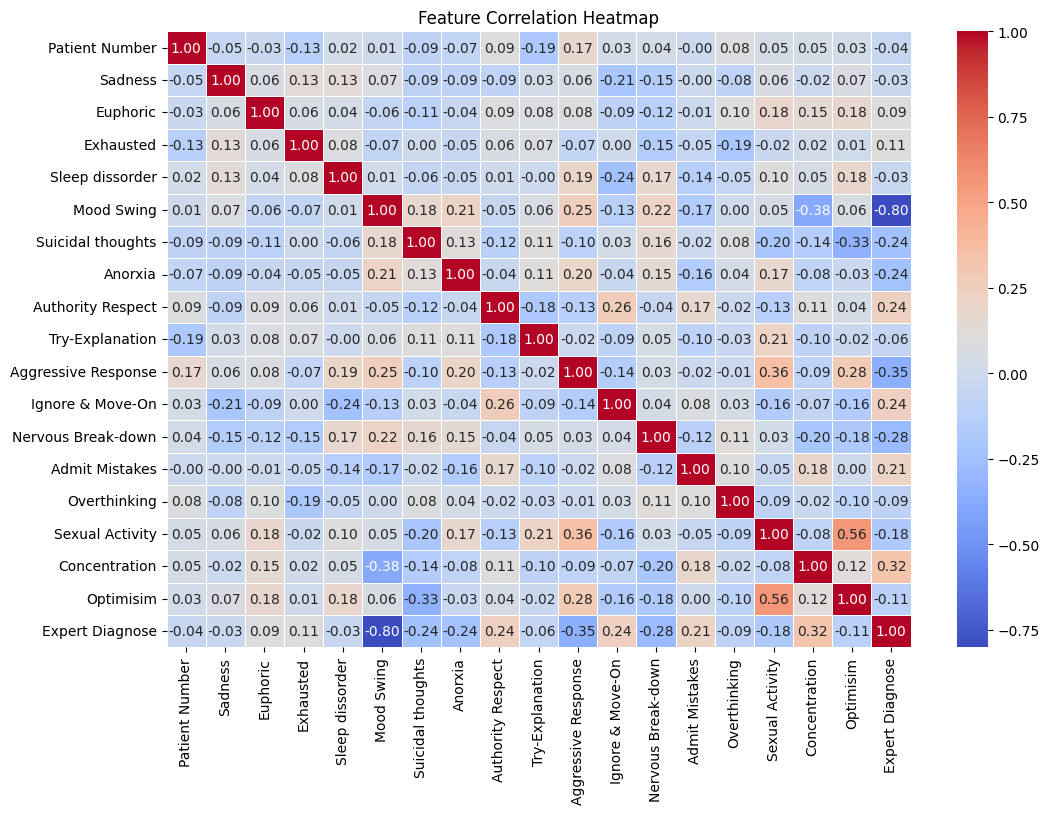

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load dataset
file_path = "/content/Dataset-Mental-Disorders.csv"  # Update file path
df = pd.read_csv(file_path)

# Encode categorical features if needed
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = LabelEncoder().fit_transform(df[col])

# Compute correlation matrix
corr_matrix = df.corr()

# Set a correlation threshold
threshold = 0.7  # Adjust this value to find highly correlated features

# Find feature pairs with high correlation
high_corr_features = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            high_corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Convert to DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_features, columns=["Feature 1", "Feature 2", "Correlation"])
high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False)

# Print highly correlated feature pairs
print("Highly Correlated Features (Threshold > 0.7):")
print(high_corr_df)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
